In [ ]:
import main as m
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import time


In [8]:
coverage = 5

seq_dict = {
    "numcells": 15,
    "founder_mult": 0,
    "resolution": 960,
    "block_length": 60
}

read_dict = {
    "readlen": 300,
    "outerdist": 2500, 
    "numreads": 50000,
    "readmode": 1
}

exp_dict = {
    "p": "exp40"
}

# FIXME later, want these to be high level and then we do
# one more level for mixtures
outdir = f'{m.OUTDIR}/experiments/{exp_dict["p"]}'
_seqdir = f'{outdir}/sequences'
_readdir = f'{outdir}/reads'

subprocess.call(["mkdir", "-p", _seqdir])
subprocess.call(["mkdir", "-p", _readdir])

log = f'{outdir}/log.txt'
m._save_settings(outdir, seq_dict, read_dict, exp_dict)

tm, root, celldict, focal = m.genstep(seq_dict, _seqdir, log = log,
                                        easy = True, only_insertions=True,
                                        seq = False)
tm

Experiment log at /Users/rfeld/Documents/Research/SPATIAL/output/experiments/exp40/log.txt
Output directory: /Users/rfeld/Documents/Research/SPATIAL/output/experiments/exp40/sequences
Preparing ground truth tree...
Initializing reference genome...
Number of chromosomes in reference: 1
Generating genomes, events, and profiles...
Formating and saving profiles


Mutation(edgeid='cell4.0', allele=1, num_copies=2, relstart=52466880, refstart=20029440, length=25920, d={'numcells': 15, 'founder_mult': 0, 'resolution': 960, 'block_length': 60})

In [6]:
26079360 + 2904960

28984320

In [4]:
fp, aug_fp = m.populate_fa(tm, celldict, _seqdir, seq_dict, log = log)

In [10]:
is_insertion = (tm.num_copies != 0)
length = tm.length
rl = tm.refstart 
rr = rl + length
tm

Mutation(edgeid='cell4.1', allele=1, num_copies=4, relstart=37790400, refstart=39435840, length=109440, d={'numcells': 10, 'founder_mult': 1, 'resolution': 960, 'block_length': 60})

In [11]:
# short trial run for setup check
# coverage = .1
# threshold = 500

# signal = []
# peaks = []
# readnames = {}

# readdir = f"{_readdir}/b0"
# subprocess.call(["mkdir", "-p", readdir])
# num_reads_by_coverage_mult = coverage * tm.length * tm.num_copies // 300 
# # read_dict["numreads"] = int(num_reads_by_coverage_mult)
# results, suspects = m.readstep2(read_dict, readdir, f"b0", tm, aug_fp, log = log)


# for r in results:
#     # we detect an island when a coordinate flip has occurred, or very large gap
#     is_island = int((r[1] > r[2]) or (r[2] - r[1] > threshold))
#     # the island is actually from the insertion event when: 
#     # (a) both endpoints are mapped to inside the true region, AND
#     # (b) we get the swap.
#     is_true = int((r[1] > r[2]) & (r[2] > rl) & (r[1] < rr))
#     readnames[r] = (is_island, is_true)

In [12]:
# many reads for bootstrapping
# coverage = 150
threshold = 500
reads_by_od = [dict() for i in range(20)]

# outerdistances = np.arange(150, 3150, 150)
outerdistances = [300, 600, 900, 1200, 1500]

for i in range(3):
    readdir = f"{_readdir}/b{i}"
    subprocess.call(["mkdir", "-p", readdir])

    read_dict["outerdist"] = outerdistances[i]
    total_read_length = read_dict["readlen"] * 2 + read_dict["outerdist"]
    # num_reads_by_coverage_mult = coverage * tm.length * tm.num_copies //  total_read_length
    # read_dict["numreads"] = int(num_reads_by_coverage_mult)

    m._save_settings(outdir, seq_dict, read_dict, exp_dict)

    results, suspects = m.readstep2(read_dict, readdir, f"b{i}", tm, aug_fp, log = log)

    for r in results:
        # we detect an island when a coordinate flip has occurred, or very large gap
        is_island = int((r[1] > r[2]) or (r[2] - r[1] > threshold) and (r[3] == 60))
        # the island is actually from the insertion event when: 
        # (a) both endpoints are mapped to inside the true region, AND
        # (b) we get the swap.
        is_true = int((r[1] > r[2]) & (r[2] > rl) & (r[1] < rr))
        reads_by_od[i][r] = (is_island, is_true, r[3])

Experiment log at /Users/rfeld/Documents/Research/SPATIAL/output/experiments/exp36/log.txt


[dwgsim_core] cell4.1.37779840.38237760 length: 457920
[dwgsim_core] 1 sequences, total length: 457920
[dwgsim_core] Currently on: 
[dwgsim_core] 50000
[dwgsim_core] Complete!
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 33334 sequences (10000200 bp)...
[M::process] read 33334 sequences (10000200 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (9, 0, 0, 16495)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] skip orientation FR as there are not enough pairs
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation RR...
[M::mem_pestat] (25, 50, 75) percentile: (16, 34, 58)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 142)
[M::mem_pestat] mean and std.dev: (39.78, 29.08)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 184)
[M::mem_process_seqs] Processed 33334 reads in 11.361 CPU sec, 11.402 rea

Experiment log at /Users/rfeld/Documents/Research/SPATIAL/output/experiments/exp36/log.txt


[dwgsim_core] cell4.1.37779840.38237760 length: 457920
[dwgsim_core] 1 sequences, total length: 457920
[dwgsim_core] Currently on: 
[dwgsim_core] 50000
[dwgsim_core] Complete!
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 33334 sequences (10000200 bp)...
[M::process] read 33334 sequences (10000200 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 0, 0, 16436)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] skip orientation FR as there are not enough pairs
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation RR...
[M::mem_pestat] (25, 50, 75) percentile: (266, 300, 333)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (132, 467)
[M::mem_pestat] mean and std.dev: (299.52, 50.06)
[M::mem_pestat] low and high boundaries for proper pairs: (65, 534)
[M::mem_process_seqs] Processed 33334 reads in 11.499 CPU sec, 11.

Experiment log at /Users/rfeld/Documents/Research/SPATIAL/output/experiments/exp36/log.txt


[dwgsim_core] cell4.1.37779840.38237760 length: 457920
[dwgsim_core] 1 sequences, total length: 457920
[dwgsim_core] Currently on: 
[dwgsim_core] 50000
[dwgsim_core] Complete!
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 33334 sequences (10000200 bp)...
[M::process] read 33334 sequences (10000200 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 0, 0, 16435)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] skip orientation FR as there are not enough pairs
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation RR...
[M::mem_pestat] (25, 50, 75) percentile: (567, 600, 634)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (433, 768)
[M::mem_pestat] mean and std.dev: (600.34, 49.74)
[M::mem_pestat] low and high boundaries for proper pairs: (366, 835)
[M::mem_process_seqs] Processed 33334 reads in 11.538 CPU sec, 11

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize storage
island_counts = []
true_counts = []
island_counts_q60 = []
true_counts_q60 = []

for read_dict in reads_by_od:
    vals = np.array(list(read_dict.values()))  # shape: (n_reads, 3)
    
    # Unfiltered counts
    island_flags = vals[:, 0]
    true_flags = vals[:, 1]
    
    # Filtered counts (MAPQ == 60)
    highq_mask = vals[:, 2] == 60
    island_flags_q60 = island_flags[highq_mask]
    true_flags_q60 = true_flags[highq_mask]

    # Append totals
    island_counts.append(np.sum(island_flags))
    true_counts.append(np.sum(true_flags))
    island_counts_q60.append(np.sum(island_flags_q60))
    true_counts_q60.append(np.sum(true_flags_q60))

# Convert to arrays
island_counts = np.array(island_counts)
true_counts = np.array(true_counts)
island_counts_q60 = np.array(island_counts_q60)
true_counts_q60 = np.array(true_counts_q60)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Panel 1: Detected islands
axs[0].plot(outerdistances, island_counts, marker='o', color='tab:blue', label="All")
axs[0].plot(outerdistances, island_counts_q60, marker='o', linestyle='--', color='tab:orange', label="MAPQ 60 only")
axs[0].set_ylabel("Detected Islands")
axs[0].set_title("Detected Islands by Outer Distance (Controlled Coverage)")
axs[0].grid(True)
axs[0].legend()

# Panel 2: True islands
axs[1].plot(outerdistances, true_counts, marker='x', color='tab:green', label="All")
axs[1].plot(outerdistances, true_counts_q60, marker='x', linestyle='--', color='tab:red', label="MAPQ 60 only")
axs[1].set_xlabel("Outer Distance")
axs[1].set_ylabel("True Islands")
axs[1].set_title("True Islands by Outer Distance")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [15]:
for i, od_dict in enumerate(reads_by_od):
    outerdist = outerdistances[i]
    
    all_values = list(od_dict.values())
    total_islands = sum(val[0] for val in all_values)
    total_true = sum(val[1] for val in all_values)

    perfect = [val for val in all_values if val[2] == 60]
    perfect_islands = sum(val[0] for val in perfect)
    perfect_true = sum(val[1] for val in perfect)

    print(f"Outer dist {outerdist}:")
    print(f"  Total islands: {total_islands}")
    print(f"  Total true: {total_true}")
    print(f"  Perfect MQ islands: {perfect_islands}")
    print(f"  Perfect MQ true: {perfect_true}")


Outer dist 300:
  Total islands: 50
  Total true: 16
  Perfect MQ islands: 49
  Perfect MQ true: 16
Outer dist 600:
  Total islands: 25
  Total true: 0
  Perfect MQ islands: 24
  Perfect MQ true: 0
Outer dist 900:
  Total islands: 46057
  Total true: 0
  Perfect MQ islands: 46057
  Perfect MQ true: 0
Outer dist 1200:
  Total islands: 0
  Total true: 0
  Perfect MQ islands: 0
  Perfect MQ true: 0
Outer dist 1500:
  Total islands: 0
  Total true: 0
  Perfect MQ islands: 0
  Perfect MQ true: 0


IndexError: list index out of range

ValueError: x and y must have same first dimension, but have shapes (3,) and (20,)

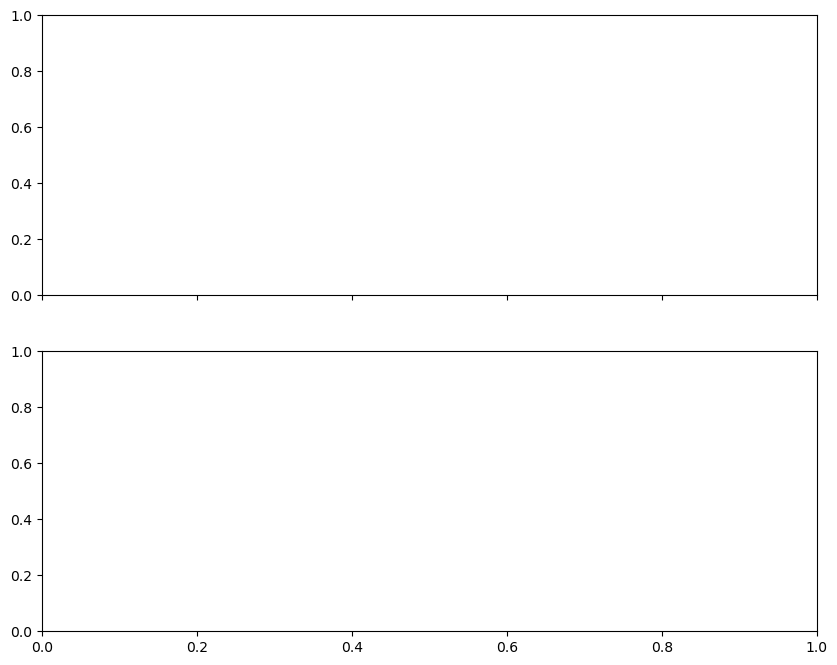

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize storage
island_counts = []
true_counts = []
island_counts_q60 = []
true_counts_q60 = []

for read_dict in reads_by_od:
    if not read_dict:
        # If this outer-distance group has no reads, append zeros
        island_counts.append(0)
        true_counts.append(0)
        island_counts_q60.append(0)
        true_counts_q60.append(0)
        continue

    # Collect values into arrays
    vals = list(read_dict.values())
    vals_array = np.array(vals)

    # Defensive reshape in case it's a single element
    if vals_array.ndim == 1:
        vals_array = vals_array.reshape(1, -1)

    island_flags = vals_array[:, 0]
    true_flags = vals_array[:, 1]
    mapqs = vals_array[:, 2]

    # Apply MAPQ filter
    highq_mask = mapqs == 60
    island_flags_q60 = island_flags[highq_mask]
    true_flags_q60 = true_flags[highq_mask]

    # Append counts
    island_counts.append(np.sum(island_flags))
    true_counts.append(np.sum(true_flags))
    island_counts_q60.append(np.sum(island_flags_q60))
    true_counts_q60.append(np.sum(true_flags_q60))

# Convert to arrays for plotting
outerdistances = np.array(outerdistances)
island_counts = np.array(island_counts)
true_counts = np.array(true_counts)
island_counts_q60 = np.array(island_counts_q60)
true_counts_q60 = np.array(true_counts_q60)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Panel 1: Detected islands
axs[0].plot(outerdistances, island_counts, marker='o', color='tab:blue', label="All")
axs[0].plot(outerdistances, island_counts_q60, marker='o', linestyle='--', color='tab:orange', label="MAPQ 60 only")
axs[0].set_ylabel("Detected Islands")
axs[0].set_title("Detected Islands by Outer Distance (Controlled Coverage)")
axs[0].grid(True)
axs[0].legend()

# Panel 2: True islands
axs[1].plot(outerdistances, true_counts, marker='x', color='tab:green', label="All")
axs[1].plot(outerdistances, true_counts_q60, marker='x', linestyle='--', color='tab:red', label="MAPQ 60 only")
axs[1].set_xlabel("Outer Distance")
axs[1].set_ylabel("True Islands")
axs[1].set_title("True Islands by Outer Distance")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize storage
island_counts = []
true_counts = []
island_counts_q60 = []
true_counts_q60 = []

for read_dict in reads_by_od:
    # Unpack values into separate arrays
    island_flags, true_flags, mapqs = zip(*read_dict.values())
    island_flags = np.array(island_flags)
    true_flags = np.array(true_flags)
    mapqs = np.array(mapqs)

    # Filtered counts (MAPQ == 60)
    highq_mask = mapqs == 60
    island_flags_q60 = island_flags[highq_mask]
    true_flags_q60 = true_flags[highq_mask]

    # Append totals
    island_counts.append(np.sum(island_flags))
    true_counts.append(np.sum(true_flags))
    island_counts_q60.append(np.sum(island_flags_q60))
    true_counts_q60.append(np.sum(true_flags_q60))

# Convert to arrays
outerdistances = np.array(outerdistances)
island_counts = np.array(island_counts)
true_counts = np.array(true_counts)
island_counts_q60 = np.array(island_counts_q60)
true_counts_q60 = np.array(true_counts_q60)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Panel 1: Detected islands
axs[0].plot(outerdistances, island_counts, marker='o', color='tab:blue', label="All")
axs[0].plot(outerdistances, island_counts_q60, marker='o', linestyle='--', color='tab:orange', label="MAPQ 60 only")
axs[0].set_ylabel("Detected Islands")
axs[0].set_title("Detected Islands by Outer Distance (Controlled Coverage)")
axs[0].grid(True)
axs[0].legend()

# Panel 2: True islands
axs[1].plot(outerdistances, true_counts, marker='x', color='tab:green', label="All")
axs[1].plot(outerdistances, true_counts_q60, marker='x', linestyle='--', color='tab:red', label="MAPQ 60 only")
axs[1].set_xlabel("Outer Distance")
axs[1].set_ylabel("True Islands")
axs[1].set_title("True Islands by Outer Distance")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

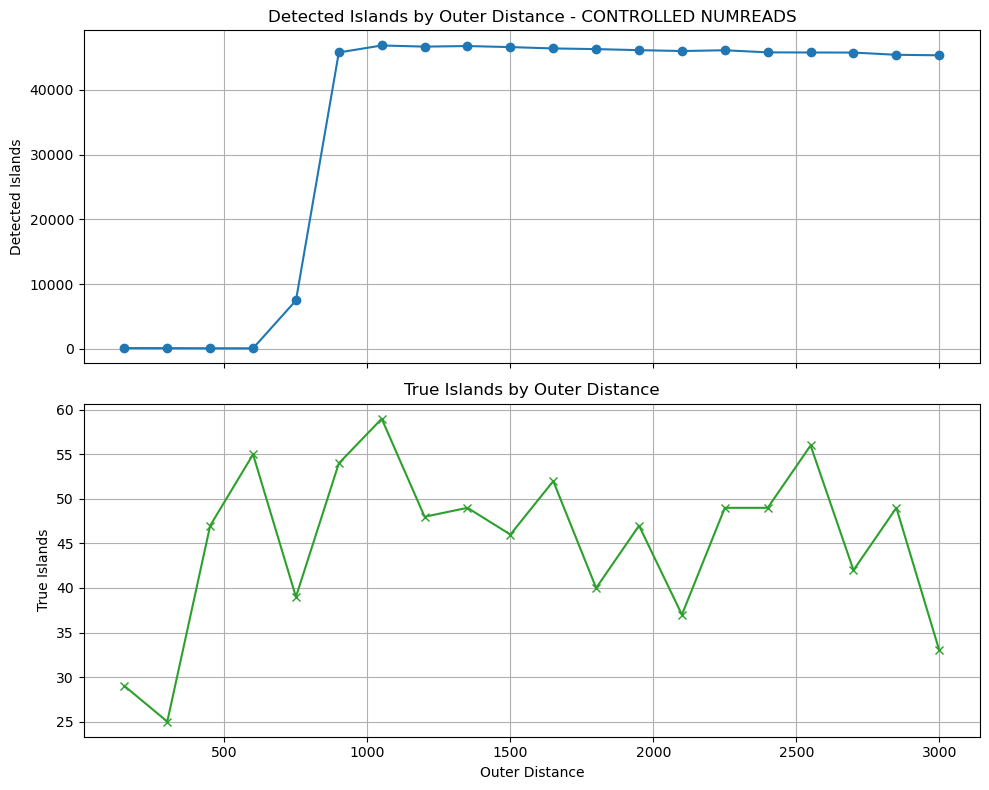

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store counts per outer distance
island_counts = []
true_counts = []

for read_dict in reads_by_od:
    island_flags = np.asarray([val[0] for val in read_dict.values()])
    true_flags = np.asarray([val[1] for val in read_dict.values()])
    island_counts.append(np.sum(island_flags))
    true_counts.append(np.sum(true_flags))

# Convert to arrays for plotting
island_counts = np.array(island_counts)
true_counts = np.array(true_counts)

# Assuming island_counts and true_counts already exist
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot detected islands
axs[0].plot(outerdistances, island_counts, marker='o', color='tab:blue')
axs[0].set_ylabel("Detected Islands")
axs[0].set_title("Detected Islands by Outer Distance - CONTROLLED NUMREADS")
axs[0].grid(True)

# Plot true islands
axs[1].plot(outerdistances, true_counts, marker='x', color='tab:green')
axs[1].set_xlabel("Outer Distance")
axs[1].set_ylabel("True Islands")
axs[1].set_title("True Islands by Outer Distance")
axs[1].grid(True)

plt.tight_layout()
plt.show()
